# Plan of Attack

Attributes of content to consider - runtime, genre, actors cast, type of title. We always want to correlate to box office gross first. Second indicator? Budget? Profitability?

professional_names_df - is our basic crew information. Actor information (living or dead) as well as known for titles in IMDB naming convention.

title_key_df is movie title_ID (use as key to translate across dataframes?) We also know 'region' but no indication of what that is, and language.

imdb_genres_df is movies by runtime and genre, also year it was released. This could be very useful. genre_list has a full list of all categories, lots of null values

box_gross_df is movies by gross from 2010-2018 

crew_df is movie set job I think?

directors_df is directors and writers, but by IMDB ID - need to convert

imdb_ratings_df is audience reviews and number of reviews by movie - added primary titles. No num values.

rt_details_df is Rotten Tomatoes basic info about movies - includes genres as well

rt_reviews_df is Rotten Tomatoes reviews by movie - includes fresh/rotten - 9 duplicates

tmdb_df is TMDB ratings on 25000 movies - looks super helpful

budget_df is a list of movie budgets and grosses. Combine with df_4 to create the best list of Y values for future visualizations

## Current Data Points
- Domestic Box Office Gross
- Foreign Box Office Gross
- Actors by movie
- Directors by movie
- Producers by movie
- Writers by movie
- Movie Runtime
- Studio
- IMDB ratings
- RT freshness
- TMDB Popularity
- TMDB vote count, vote average
- Production budget vs. gross

## Initial Questions
- What genres produce the most popularity AND the most positive audience votes?
- What directors/writers/producers have the best ROI?
- What actors have the most popularity and/or box office gross?
- Is there an ideal movie budget to maximize ROI by genre?


## To Do By Question

#### General Data Cleaning
- Create DataFrame with following columns: 
- Movie Title 
- IMDB Code 
- Directors 
- Writers  
- Producers
- IMDB vote count
- IMDB vote score
- TMDB vote count
- TMDB vote score
- RT Freshness
- Popularity
- Domestic Gross
- Budget
- Foreign Gross
- Genres
- Studio?
- (Top 3 Actors?)

#### What genres produce the most popularity AND the most positive audience votes?

- df_11 vs. df_10 - popularity and budget
- df_11 w/ df_2 w/ df_7 - IMDB votes
- Parse out Genres - map function?
- Parse out directors/writers/producers
- Actors???
- turn all budget info into float64 in terms of millions


In [ ]:
#Isolate and clean Popularity
#Link popularity, RT freshness, IMDB vount data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
%matplotlib inline

In [2]:
# Import all data files. Key to what's in files included in README at top of notebook.

professional_names_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
title_key_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_genres_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
box_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
crew_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
directors_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_details_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter='\t')
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='iso-8859-1')
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
def clean_title(title):
    
    '''
    Takes a string and normalizes it by removing excess symbols that could be ambiguous
    Also removes any dates attached to titles. These will be added back in during data cleaning.
    '''
    
    c_title = ''
    l_title = title.lower()
    
    word_list = l_title.split()
    
    for word in word_list:
        if word[0] == '(':
            break
        else:
            word = word.replace('?','')
            word = word.replace('/','')
            word = word.replace('!','')
            word = word.replace('–','')
            word = word.replace('-','')
            word = word.replace('&','and')
            word = word.replace('ep.','episode')
            word = word.replace(':','')
            word = word.replace(',','')
            word = word.replace('.','')
            word = word.replace("'","")
            word = word.replace("`",'')
        
            c_title += word.title()
    
    return c_title

In [4]:
def separate_values(string):
    '''
    Splits any string by a comma and then returns a list of values
    '''
    if type(string) == str:
        value_list = string.split(',')
    else:
        return string
    
    return value_list

In [5]:
def clean_money(string):
    '''
    Takes money objects and turns it into a float
    '''
    if type(string) == str:
        answer = string.replace('$','')
        answer = answer.replace(',','')
        answer = float(answer)
    else:
        return string
    return answer

In [6]:
# Creates the IMDB table to add to other tables. Includes title_id for merging as well as genres
imdb_genres_df.rename(columns={'tconst':'title_id'},inplace=True)
imdb_df = title_key_df.merge(imdb_genres_df,how='left',on='title_id')
imdb_df = imdb_df.loc[:,['title_id','title','primary_title','start_year','runtime_minutes','genres']]
imdb_df['clean_title'] = imdb_df.title.map(lambda x: clean_title(x))

#Renames columns to clean. Splits genres into a list that can be parsed later.
imdb_df.rename(columns={'start_year':'year','runtime_minutes':'runtime'},inplace=True) #Change year into string?
imdb_df['clean_title'] = imdb_df['clean_title'] + " " + imdb_df['year'].astype(str)


In [7]:
# #Join box office gross to IMDB t_const - #Start with 3387 - goes to 2523
# box_gross_df['clean_title'] = box_gross_df.title.map(lambda x: clean_title(x))
# box_gross_df['clean_title'] = box_gross_df['clean_title'] box_gross_df['year'].astype(str),sep=' ')

# box_gross_tconst_df = box_gross_df.merge(imdb_df, how='left',on='clean_title')

# box_gross_tconst_df.drop_duplicates(inplace=True)
# box_gross_tconst_df.dropna(subset=['title_id'], inplace=True)
# # box_gross_tconst_df.drop_duplicates(subset=['title_id'], inplace=True)
# # box_gross_tconst_df.drop_duplicates(subset=['title_x'], inplace=True)
# box_gross_tconst_df.drop(columns=['title_y','year_y'], inplace = True)
# box_gross_tconst_df.rename(columns={'title_x':'title','year_x':'year'},inplace=True)

# #Fixes foreign gross from string to float
# box_gross_tconst_df.foreign_gross = box_gross_tconst_df.foreign_gross.map(lambda x: clean_money(x) if type(x) == str else x)
# box_gross_tconst_df.foreign_gross.astype('float64')
# box_gross_final = box_gross_tconst_df

In [8]:
# def similar(a, b):
#     ratio = SequenceMatcher(None, a, b).ratio()
#     return ratio >= .9

In [9]:
#Joins budget table with IMDB t-const - Goes from 5782 records to 4069
budget_df.rename(columns={'movie':'title'},inplace=True)
budget_df['year'] = budget_df.release_date.map(lambda x: x.split()[-1])
budget_df['clean_title'] = budget_df.title.map(lambda x: clean_title(x))
budget_df['clean_title'] = budget_df['clean_title'] + ' ' + budget_df['year'].astype(str)

budget_tconst_df = budget_df.merge(imdb_df, how='left',on='clean_title')
budget_tconst_df.drop_duplicates(inplace=True)
budget_tconst_df.drop(columns=['title_y','year_y'],inplace = True)
budget_tconst_df.rename(columns={'title_x':'title','year_x':'year'},inplace=True)
# budget_tconst_df.drop_duplicates(subset='title_id',inplace = True)

#Turns money columns into floats from objects
budget_tconst_df['production_budget'] = budget_tconst_df.production_budget.map(lambda x: clean_money(x)) 
budget_tconst_df['domestic_gross'] = budget_tconst_df.domestic_gross.map(lambda x: clean_money(x))
budget_tconst_df['worldwide_gross'] = budget_tconst_df.worldwide_gross.map(lambda x: clean_money(x))
final_budget_df = budget_tconst_df

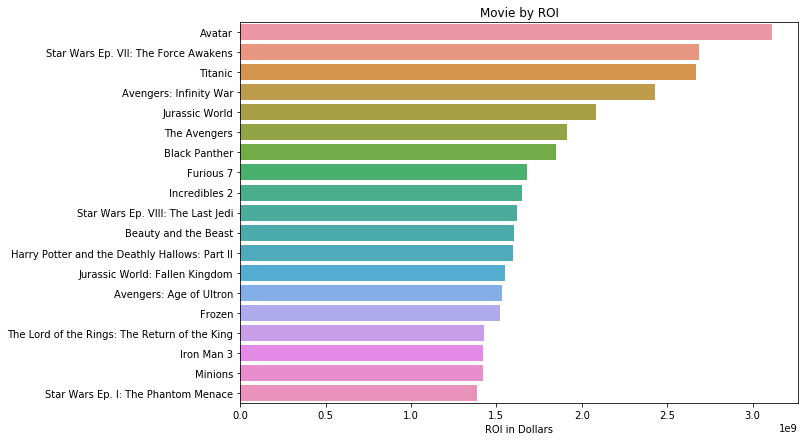

In [10]:
#Creates an ROI column for films and creates a column with a boolean value based on whether or not it's profitable
final_budget_df['ROI'] = final_budget_df['worldwide_gross'] + final_budget_df['domestic_gross'] - final_budget_df['production_budget']
final_budget_df['ROI%'] = final_budget_df['ROI']/final_budget_df['production_budget']
budget_ROI_df = final_budget_df.sort_values(by='ROI',ascending=False)
budget_ROI_df['Profitable'] = budget_ROI_df.ROI.map(lambda x: x>0)


x_values = list(budget_ROI_df.title[:20])
y_values = list(budget_ROI_df.ROI[:20])

plt.figure(figsize=(10,7))
sns.barplot(y=x_values, x=y_values, data = final_budget_df, orient='h')
plt.xlabel('ROI in Dollars')
plt.title('Movie by ROI');

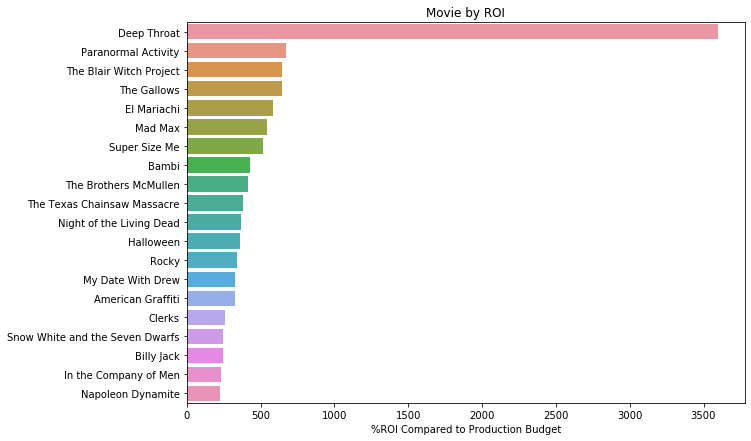

In [11]:
final_budget_df['ROI%'] = final_budget_df['ROI']/final_budget_df['production_budget']
budget_ROI_df = budget_ROI_df.sort_values(by='ROI%',ascending=False)

x_values = list(budget_ROI_df.title[:20])
y_values = list(budget_ROI_df['ROI%'][:20])

plt.figure(figsize=(10,7))
sns.barplot(y=x_values, x=y_values, data = final_budget_df, orient='h')
plt.xlabel('%ROI Compared to Production Budget')
plt.title('Movie by ROI')

In [12]:
#Joins the TMDB table, which includes information regarding popularity by film.
tmdb_df['clean_title'] = tmdb_df.title.map(lambda x: clean_title(x))
tmdb_df['year'] = tmdb_df.release_date.map(lambda x: x.split('-')[0])
tmdb_df['clean_title'] = tmdb_df['clean_title'] + ' ' + tmdb_df['year'].astype(str)

tmdb_tconst_df = tmdb_df.merge(imdb_df,how='inner',on='clean_title')
tmdb_tconst_df.drop_duplicates(subset='title_id',inplace=True)
tmdb_clean_df = tmdb_tconst_df.loc[:, ['popularity','vote_average','vote_count','clean_title','title_id']]

In [13]:
#Creates Super_df that contains ROI, popularity, IMDB rating and vote counts.
imdb_ratings_df.rename(columns={'tconst':'title_id'},inplace=True)
super_df = budget_ROI_df.merge(tmdb_clean_df,how='left',on='title_id')
super_df = super_df.merge(imdb_ratings_df,how='left',on='title_id')
super_df.drop(columns=['clean_title_y'],inplace=True)

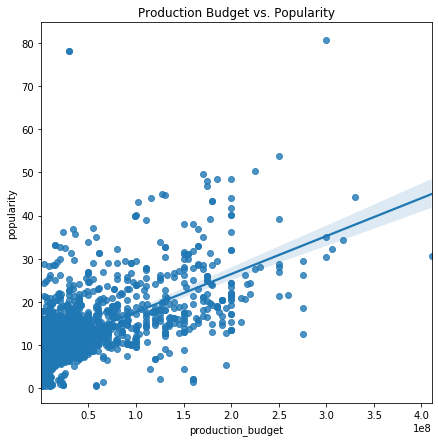

In [14]:
#Creates Linear Regression showing relationship between production budget and popularity
plt.figure(figsize=(7,7))

sns.regplot(x=super_df.production_budget, y=super_df.popularity, data=super_df)
plt.title('Production Budget vs. Popularity');

In [15]:
#Creates list of genres from the IMDB dataframes
genre_list = list(super_df.genres)
genre_list2 = []

#iterates through the list and adds the genres to a set to get a set of unique values
for item in genre_list:
    if type(item) == str:
        new_list = item.split(',')
        for genre in new_list:
            genre_list2.append(genre)

genre_set = set(genre_list2)


In [16]:
# drops 36 films that do not have genres
super_df.dropna(subset=['genres'],inplace=True)

In [17]:
# creates a column for each genre populated with a boolean value if it is in the genre list for that movie.
for genre in list(genre_set):
    super_df[f'{genre}'] = super_df.genres.map(lambda x: genre in x)

In [18]:
# splits the genres into a list, counts the list and adds a column with the number of genres in list
super_df['genres'] = super_df.genres.map(lambda x: separate_values(x))
super_df['genre_count'] = super_df.genres.map(lambda x: len(x))

In [19]:
# Groups by number of genres and giveds the mean popularity, rating and vote average
super_df[['ROI','popularity','averagerating','vote_average','genre_count']].groupby(by=['genre_count']).mean().sort_values(by='ROI')

,ROI,popularity,averagerating,vote_average
genre_count,,,,
1,4.979648e+07,8.359744,6.037915,6.060099
2,9.369759e+07,10.573929,6.207561,6.254198
3,1.979521e+08,14.638115,6.356218,6.311142


In [20]:
# Groups by number of genres and giveds the mean popularity, rating and vote average
super_df[['ROI','popularity','averagerating','vote_average','genre_count']].groupby(by=['genre_count']).median().sort_values(by='ROI')


,ROI,popularity,averagerating,vote_average
genre_count,,,,
1,3251244.0,8.3570,6.3,6.2
2,31750287.0,9.6200,6.3,6.3
3,75577726.0,12.7495,6.5,6.3


In [21]:
#Creates separate dataframes for each genre count category for cleaning and manipulation
single_genre = super_df[['title','ROI','popularity','averagerating','vote_average','genre_count']].loc[super_df.genre_count == 1].sort_values(by=['ROI'],ascending=False)
double_genre = super_df[['title','ROI','popularity','averagerating','vote_average','genre_count']].loc[super_df.genre_count == 2].sort_values(by=['ROI'],ascending=False)
triple_genre = super_df[['title','ROI','popularity','averagerating','vote_average','genre_count']].loc[super_df.genre_count == 3].sort_values(by=['ROI'],ascending=False)


In [22]:
#Takes the top 50 entries per category
single_genre.drop_duplicates(subset=['title'],inplace=True)
single_short = single_genre.iloc[:50]

double_genre.drop_duplicates(subset=['title'],inplace=True)
double_short = double_genre.iloc[:50]

triple_genre.drop_duplicates(subset=['title'],inplace=True)
triple_short = triple_genre.iloc[:50]

In [23]:
#Joins the dataframes into a single dataframe with 50 entries per genre grouping
genre_df = pd.concat([single_short,double_short,triple_short])

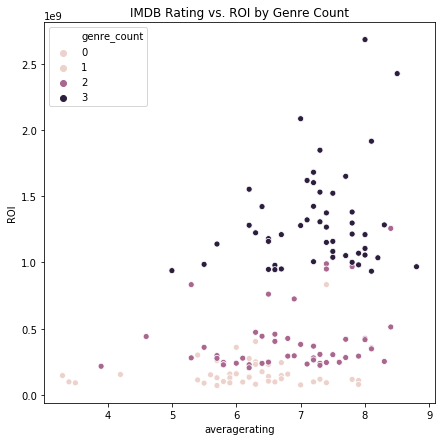

In [24]:
plt.figure(figsize=(7,7))

sns.scatterplot(x=genre_df.averagerating,y=genre_df.ROI,data=genre_df,hue='genre_count')

plt.title('IMDB Rating vs. ROI by Genre Count');

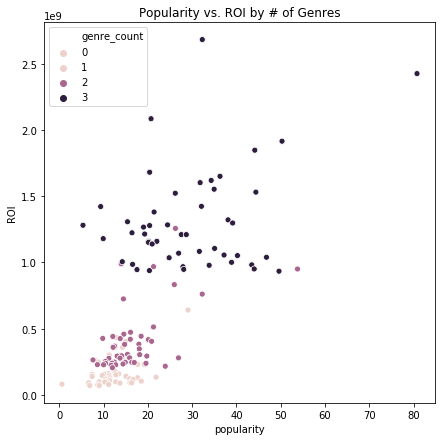

In [25]:
plt.figure(figsize=(7,7))

sns.scatterplot(x=genre_df.popularity,y=genre_df.ROI,data=genre_df,hue='genre_count')

plt.title('Popularity vs. ROI by # of Genres');

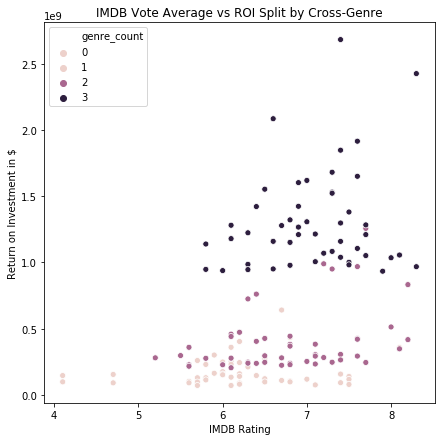

In [26]:
plt.figure(figsize=(7,7))

sns.scatterplot(x=genre_df.vote_average,y=genre_df.ROI,data=genre_df,hue='genre_count')
plt.title('IMDB Vote Average vs ROI Split by Cross-Genre')
plt.xlabel('IMDB Rating')
plt.ylabel('Return on Investment in $');

In [27]:
# Used this to figure out 25% quartile
super_df.vote_count.describe()

count     1682.000000
mean      2175.905470
std       2894.528106
min          1.000000
25%        307.750000
50%       1078.000000
75%       2813.250000
max      22186.000000
Name: vote_count, dtype: float64

In [28]:
# Creates a version of the super_df but with only movies having both more than 500 IMDB votes and 20000 TMDB votes
super_vote_df = super_df.loc[(super_df.vote_count > 500) & (super_df.numvotes > 20000)]
super_vote_df.rename(columns={'vote_average':'IMDB Quality','averagerating':'TMDB Quality','clean_title_x':'clean_title'},inplace=True)

/Users/andrew/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [29]:
def genre_counts(dataframe,column):
    '''
    Takes in a dataframe and a column. Orders the DF by the values in the column in question, cuts in down
    to the top 100 entries. Counts how many of the movies have each genre and then plots a horizontal
    bar graph to show top genres by the column metric. 
    '''
    df = dataframe.sort_values(by=[column],ascending=False)
    df = df.iloc[:100]
    df = pd.DataFrame(df[list(genre_set)].sum())
    df.columns = ['count']
    df.sort_values(by='count',ascending=False,inplace=True)
    plt.figure(figsize=(7,7))
    x_values = list(df['count'])
    y_values = list(df.index)
    plt.title(f'Genres ordered by {column}')
    plt.xlabel('Number of Movies')
    plt.ylabel('Genres')
    return sns.barplot(y=y_values,x=x_values, data=df, orient='h');

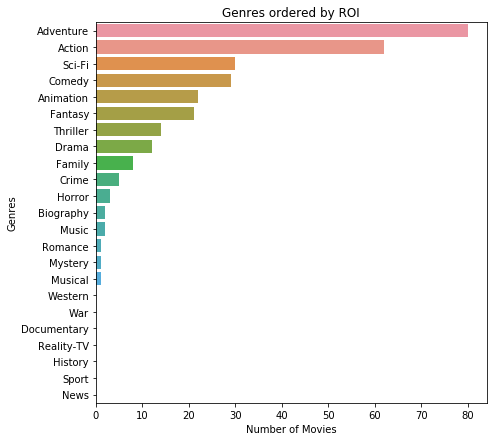

In [30]:
genre_counts(super_vote_df,'ROI');

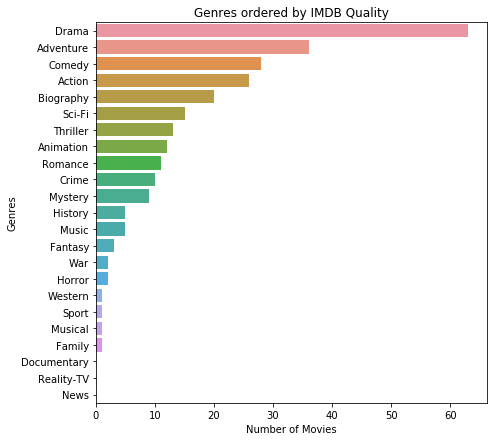

In [31]:
genre_counts(super_vote_df,'IMDB Quality');

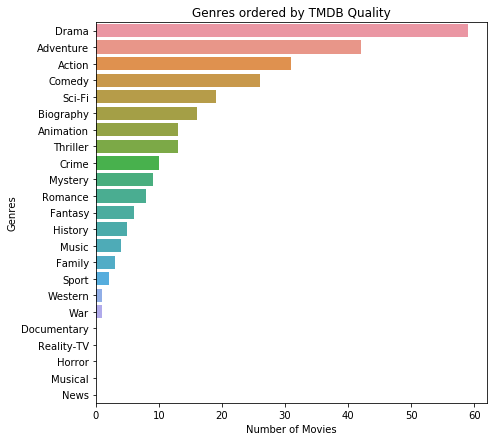

In [32]:
genre_counts(super_vote_df,'TMDB Quality');

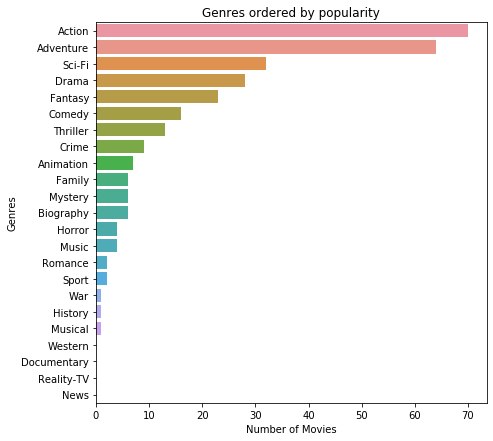

In [33]:
genre_counts(super_vote_df,'popularity');

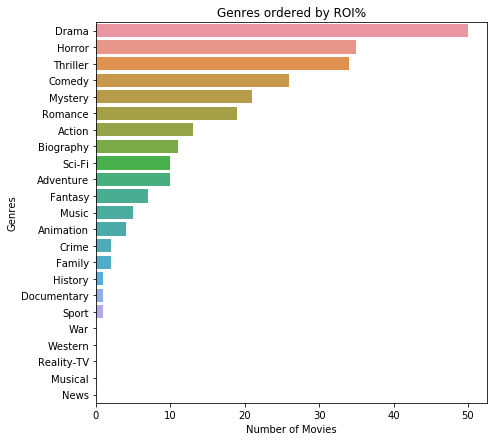

In [34]:
genre_counts(super_vote_df,'ROI%');

In [40]:
imdb_df.head()

,title_id,title,primary_title,year,runtime,genres,clean_title
0,tt0369610,Джурасик свят,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",ДжурасикСвят 2015
1,tt0369610,Jurashikku warudo,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",JurashikkuWarudo 2015
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",JurassicWorldOMundoDosDinossauros 2015
3,tt0369610,O Mundo dos Dinossauros,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",OMundoDosDinossauros 2015
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",JurassicWorld 2015


In [42]:
crew_df.head()

,title_id,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [ ]:
crew_df.rename(columns={'tconst':'title_id'},inplace=True)
crew_df = crew_df.loc[(crew_df.category == 'actor') | (crew_df.category == 'actress') | (crew_df.category == 'producer') | (crew_df.category == 'writer') | (crew_df.category == 'director')]
crew_df = crew_df.merge(professional_names_df, how='left', on='nconst')
crew_df.drop(columns=['characters','job','nconst','ordering','birth_year','death_year','primary_profession','known_for_titles'],inplace=True)
super_crew_df = super_vote_df.merge(crew_df,how='left',on='title_id')

In [49]:
crew_df = crew_df.merge(professional_names_df, how='left', on='nconst')

In [52]:
crew_df.drop(columns=['characters','job','nconst','ordering','birth_year','death_year','primary_profession','known_for_titles'],inplace=True)

In [54]:
super_crew_df = super_vote_df.merge(crew_df,how='left',on='title_id')

In [35]:
#Builds new Dataframe using the IMDB data
clean_imdb_df = imdb_df.loc[imdb_df.primary_title == imdb_df.title]
clean_imdb_df = clean_imdb_df.merge(imdb_ratings_df, how='left', on='title_id')
clean_imdb_df.drop_duplicates(inplace=True)


In [36]:
directors_df.rename(columns={'tconst':'title_id'},inplace=True)

In [37]:
clean_imdb_df = clean_imdb_df.merge(directors_df, how='left', on='title_id')

In [38]:
#Creates a dataframe from the Crew Dataframe that only includes actors, actresses, producers, writers, directors

crew_df.rename(columns={'tconst':'title_id'},inplace=True)
non_directors_df = crew_df.loc[(crew_df.category == 'actor') | (crew_df.category == 'actress') | (crew_df.category == 'producer') | (crew_df.category == 'writer') | (crew_df.category == 'director')]

#Combines IMDB Dataframe with the slimmed Crew dataframe and only focuses on movies with more than 500 votes on IMDB
clean_imdb_df = non_directors_df.merge(clean_imdb_df, how='left', on='title_id')
clean_imdb_df = clean_imdb_df.loc[clean_imdb_df.numvotes > 500]

#Combines Dataframes to add names to crew members 
clean_imdb_df = clean_imdb_df.merge(professional_names_df, how='left', on='nconst')

#Drops useless columns
clean_imdb_df = clean_imdb_df.drop(columns=['job','characters','ordering','title','birth_year','death_year','primary_profession','known_for_titles'])

#Combines Dataframe with the TMDB dataframe that has already been cleaned
clean_imdb_df = clean_imdb_df.merge(tmdb_clean_df, how='left', on='title_id')

In [39]:
clean_imdb_df.groupby(by=clean_imdb_df['primary_name']).mean().sort_values(by='averagerating',ascending=False)
clean_imdb_df.


,year,runtime,averagerating,numvotes,popularity,vote_average,vote_count
primary_name,,,,,,,
Lasha Kankava,2018.0,132.0,9.6,2604.0,NaN,NaN,NaN
Rezo Chkhikvishvili,2018.0,132.0,9.6,2604.0,NaN,NaN,NaN
Ana Tsereteli,2018.0,132.0,9.6,2604.0,NaN,NaN,NaN
Nikoloz Khomasuridze,2018.0,132.0,9.6,2604.0,NaN,NaN,NaN
Giorgi Megrelishvili,2018.0,132.0,9.6,2604.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Ikuya Motoki,2013.0,82.0,1.0,510.0,NaN,NaN,NaN
Ayumu Saitô,2014.0,61.0,1.0,520.0,NaN,NaN,NaN
Yukichi Kobayashi,2014.0,61.0,1.0,520.0,NaN,NaN,NaN


In [116]:
#Creates different dataframes for each of the major crew types for further analysis. Treats actors and actresses equally
actors = super_crew_df.loc[(super_crew_df.category == 'actor') | (super_crew_df.category == 'actress')]
directors = super_crew_df.loc[super_crew_df.category == 'director']
writers = super_crew_df.loc[super_crew_df.category == 'writer']
producers = super_crew_df.loc[super_crew_df.category == 'producer']

In [133]:
#Add Formatting

def top_crew(df_list,column):
    '''
    Takes a crew dataframe and finds the mean of the column metric in question and then plots a bar graph
    of the top fifty entries
    '''
    plt.figure(figsize=(20,20))
    axes = plt.subplots(nrows=2, ncols=2)
    
    for dataframe in df_list:
        df = dataframe['df'].groupby(by=dataframe['df']['primary_name']).mean().sort_values(by=f'{column}',ascending=False)
        ax = axes[dataframe['axes'][0],dataframe['axes'][1]]
        df = df.iloc[:10]
        x_values = list(df[f'{column}'])
        y_values = list(df.index)
        sns.barplot(x = x_values, y = y_values, ax=ax, data = df)
    
    return plt.show()    

AttributeError: 'int' object has no attribute 'barh'

<Figure size 1440x1440 with 0 Axes>

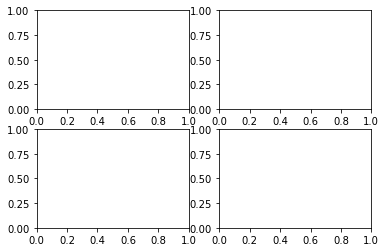

In [140]:
plt.figure(figsize=(20,20))
axes = plt.subplots(nrows=2, ncols=2)


df = actors.groupby(by=actors['primary_name']).mean().sort_values(by='popularity',ascending=False)
ax = 1
df = df.iloc[:10]
x_values = list(df['popularity'])
y_values = list(df.index)
sns.barplot(x = x_values, y = y_values, ax=ax, data = df)

plt.show()

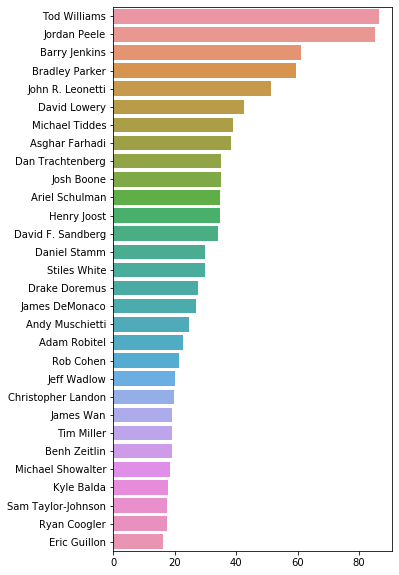

In [77]:
top_crew(directors2_df,'ROI%');

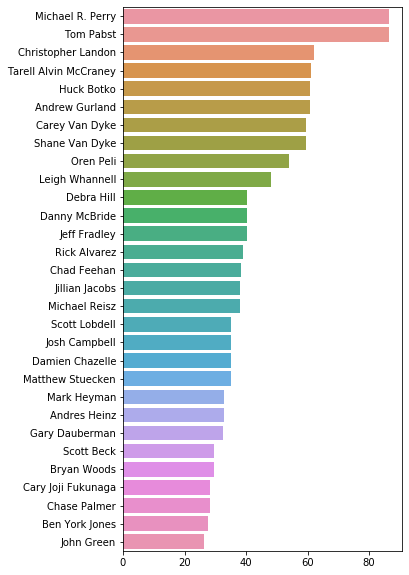

In [83]:
top_crew(writers_df,'ROI%');

In [ ]:
# ADD ROI TO clean_imdb_df
# Add columns of True/False for top pop etc.
# Rename TMDB rating + IMDB Rating
# Make sure to include movie count minimum in the recommendations

In [121]:
def create_top_df(list_of_dfs,column_name):
    
    '''
    Takes in a list of dataframe dictionaries of the format {'df':dataframe,'name':'name of dataframe'} as well as
    a column in question. It will produce a dataframe of the top thirty Actors, Directors, Producers and Writers of
    that particular metric.
    '''
    
    final_list = []
    
    for dataframe in list_of_dfs:
        name = dataframe['name']
        df = dataframe['df'].groupby(by=dataframe['df']['primary_name']).mean().sort_values(by=f'{column_name}',ascending=False)
        df = df.iloc[:30]
        df.reset_index(inplace=True)
        df = df.loc[:, ['primary_name']]
        df.rename(columns={'primary_name':f'{name}'},inplace=True)
        final_list.append(df)
    
    final_df = final_list[0].join(final_list[1:])
    final_df.rename_axis(f"By {column_name.title()}",inplace = True)
    return final_df
    

In [135]:
df_list = [
    {'df':actors,'name':'Actors','axes':[0,0]}, 
    {'df': directors, 'name': 'Directors','axes':[0,1]}, 
    {'df': writers,'name':'Writers','axes':[1,0]}, 
    {'df': producers,'name':'Producers','axes':[1,1]}
]

In [105]:
df = actors_mf_df.groupby(by=actors_mf_df['primary_name']).mean().sort_values(by='popularity',ascending=False)
df = df.iloc[:30]
df.reset_index(inplace=True)
df = df.loc[:, ['primary_name']]
df.rename(columns={'primary_name':'actors'.title()},inplace=True)

In [119]:
actors.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year,clean_title,title_id,primary_title,...,Reality-TV,Crime,Sport,Horror,Mystery,Family,Biography,genre_count,category,primary_name
1,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,2010,ParanormalActivity2 2010,tt1536044,Paranormal Activity 2,...,False,False,False,True,False,False,False,1,actress,Katie Featherston
2,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,2010,ParanormalActivity2 2010,tt1536044,Paranormal Activity 2,...,False,False,False,True,False,False,False,1,actor,Micah Sloat
3,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,2010,ParanormalActivity2 2010,tt1536044,Paranormal Activity 2,...,False,False,False,True,False,False,False,1,actress,Molly Ephraim
4,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,2010,ParanormalActivity2 2010,tt1536044,Paranormal Activity 2,...,False,False,False,True,False,False,False,1,actor,David Bierend
11,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,2017,GetOut 2017,tt5052448,Get Out,...,False,False,False,True,True,False,False,3,actor,Daniel Kaluuya


In [106]:
df_2 = directors2_df.groupby(by=directors2_df['primary_name']).mean().sort_values(by='popularity',ascending=False)
df_2 = df_2.iloc[:30]
df_2.reset_index(inplace=True)
df_2 = df_2.loc[:, ['primary_name']]
df_2.rename(columns={'primary_name':'directors'.title()},inplace=True)

In [110]:
df_3 = writers_df.groupby(by=writers_df['primary_name']).mean().sort_values(by='popularity',ascending=False)
df_3 = df_3.iloc[:30]
df_3.reset_index(inplace=True)
df_3 = df_3.loc[:, ['primary_name']]
df_3.rename(columns={'primary_name':'writers'.title()},inplace=True)

In [114]:
final_df = df.join([df_2,df_3])
final_df.rename_axis("By Popularity")

,Actors,Directors,Writers
By Popularity,,,
0,Alfie Allen,Chad Stahelski,Derek Kolstad
1,Michael Nyqvist,David Leitch,Nicole Perlman
2,Dafne Keen,Phil Johnston,Bill Mantlo
3,Lupita Nyong'o,Joss Whedon,Keith Giffen
4,Danai Gurira,Jon Watts,Hampton Fancher
5,Scott Haze,Anthony Russo,Kelly Younger
6,Patrick Stewart,Joe Russo,John Romita Sr.
7,Jason Drucker,James Gunn,Len Wein
8,Jorge Lendeborg Jr.,Christian Rivers,Roy Thomas


In [122]:
create_top_df(df_list,'popularity')

,Actors,Directors,Writers,Producers
By Popularity,,,,
0,Alfie Allen,Chad Stahelski,Derek Kolstad,Mike Witherill
1,Michael Nyqvist,David Leitch,Nicole Perlman,Eva Longoria
2,Dafne Keen,Phil Johnston,Bill Mantlo,Steve Kloves
3,Lupita Nyong'o,Joss Whedon,Keith Giffen,Lionel Wigram
4,Danai Gurira,Jon Watts,Hampton Fancher,Kevin Feige
5,Scott Haze,Anthony Russo,Kelly Younger,Jim Beach
6,Patrick Stewart,Joe Russo,John Romita Sr.,Nicole Paradis Grindle
7,Jason Drucker,James Gunn,Len Wein,John Walker
8,Jorge Lendeborg Jr.,Christian Rivers,Roy Thomas,Charles B. Wessler


In [124]:
create_top_df(df_list,'ROI%')

,Actors,Directors,Writers,Producers
By Roi%,,,,
0,Micah Sloat,Tod Williams,Michael R. Perry,Edward H. Hamm Jr.
1,David Bierend,Jordan Peele,Tom Pabst,Adele Romanski
2,Molly Ephraim,Barry Jenkins,Christopher Landon,Thomas A. Bliss
3,Allison Williams,Bradley Parker,Tarell Alvin McCraney,Brian Witten
4,Daniel Kaluuya,John R. Leonetti,Huck Botko,James M. Johnston
5,Katie Featherston,David Lowery,Andrew Gurland,Toby Halbrooks
6,Chloe Csengery,Michael Tiddes,Carey Van Dyke,Adam Donaghey
7,Lauren Bittner,Asghar Farhadi,Shane Van Dyke,Sean McKittrick
8,Christopher Nicholas Smith,Dan Trachtenberg,Oren Peli,Lawrence Grey


In [126]:
create_top_df(df_list, 'TMDB Quality')

,Actors,Directors,Writers,Producers
By Tmdb Quality,,,,
0,Mackenzie Foy,Christopher Nolan,Jonathan Nolan,Lynda Obst
1,Paul Reiser,Adrian Molina,Matthew Aldrich,Emma Thomas
2,Melissa Benoist,Lee Unkrich,Jason Katz,Reginald Hudlin
3,Alanna Ubach,Asghar Farhadi,Valérie Beaugrand-Champagne,Pilar Savone
4,Anthony Gonzalez,Ronnie Del Carmen,Wajdi Mouawad,Darla K. Anderson
5,Leila Hatami,Lenny Abrahamson,John Lasseter,Charles B. Wessler
6,Tim Allen,Pete Docter,Brian Hayes Currie,Kim McCraw
7,Sebastian Maniscalco,Garth Davis,Andrew Stanton,Luc Déry
8,Maxim Gaudette,Quentin Tarantino,Nick Vallelonga,David Gross
